<a href="https://colab.research.google.com/github/paragnayak/datasets/blob/master/Murder_Victim_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Murder_victim_age.csv')

In [42]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [43]:
df.describe()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,1018.000000,962.000000,1018.000000,876.000000,900.000000,888.000000,1009.000000,1007.000000
mean,2005.512770,67.559252,683.406680,9.536530,14.726667,17.326577,314.739346,274.230387
std,2.866127,100.650347,1015.595667,21.417212,25.355027,39.497253,483.745420,396.206952
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,3.000000,31.000000,0.000000,1.000000,0.000000,13.000000,13.000000
50%,2006.000000,25.000000,258.000000,2.000000,3.000000,3.000000,116.000000,102.000000
75%,2008.000000,86.000000,1011.750000,10.000000,18.000000,14.000000,421.000000,416.500000
max,2010.000000,824.000000,8180.000000,218.000000,189.000000,347.000000,3724.000000,3143.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
Area_Name                 1018 non-null object
Year                      1018 non-null int64
Group_Name                1018 non-null object
Sub_Group_Name            1018 non-null object
Victims_Above_50_Yrs      962 non-null float64
Victims_Total             1018 non-null int64
Victims_Upto_10_15_Yrs    876 non-null float64
Victims_Upto_10_Yrs       900 non-null float64
Victims_Upto_15_18_Yrs    888 non-null float64
Victims_Upto_18_30_Yrs    1009 non-null float64
Victims_Upto_30_50_Yrs    1007 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 87.6+ KB


In [45]:
# Checking the missing values

df.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [46]:
df.Victims_Above_50_Yrs.describe()

count    962.000000
mean      67.559252
std      100.650347
min        0.000000
25%        3.000000
50%       25.000000
75%       86.000000
max      824.000000
Name: Victims_Above_50_Yrs, dtype: float64

In [0]:
df.Victims_Above_50_Yrs.fillna(df.Victims_Above_50_Yrs.mode()[0],inplace=True)

In [48]:
df.Victims_Upto_10_15_Yrs.describe()

count    876.000000
mean       9.536530
std       21.417212
min        0.000000
25%        0.000000
50%        2.000000
75%       10.000000
max      218.000000
Name: Victims_Upto_10_15_Yrs, dtype: float64

In [0]:
df.Victims_Upto_10_15_Yrs.fillna(df.Victims_Upto_10_15_Yrs.mode()[0],inplace=True)
df.Victims_Upto_10_Yrs.fillna(df.Victims_Upto_10_Yrs.mode()[0],inplace=True)
df.Victims_Upto_15_18_Yrs.fillna(df.Victims_Upto_15_18_Yrs.mode()[0],inplace=True)
df.Victims_Upto_18_30_Yrs.fillna(df.Victims_Upto_18_30_Yrs.mode()[0],inplace=True)
df.Victims_Upto_30_50_Yrs.fillna(df.Victims_Upto_30_50_Yrs.mode()[0],inplace=True)

In [50]:

df.isnull().sum()

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
dtype: int64

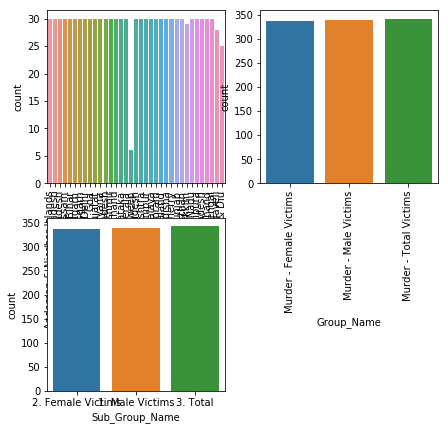

In [51]:
plt.figure(figsize=[7,7])

plt.subplot(221)
sns.countplot(df.Area_Name)
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(df.Group_Name)
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df.Sub_Group_Name)
plt.show()

In [52]:
df.Group_Name.value_counts()

Murder - Total Victims     342
Murder - Male Victims      339
Murder - Female Victims    337
Name: Group_Name, dtype: int64

In [53]:
df.Sub_Group_Name.value_counts()

3. Total             342
1. Male Victims      339
2. Female Victims    337
Name: Sub_Group_Name, dtype: int64

In [0]:
df.drop('Sub_Group_Name',axis=1,inplace=True)

<Figure size 936x936 with 0 Axes>

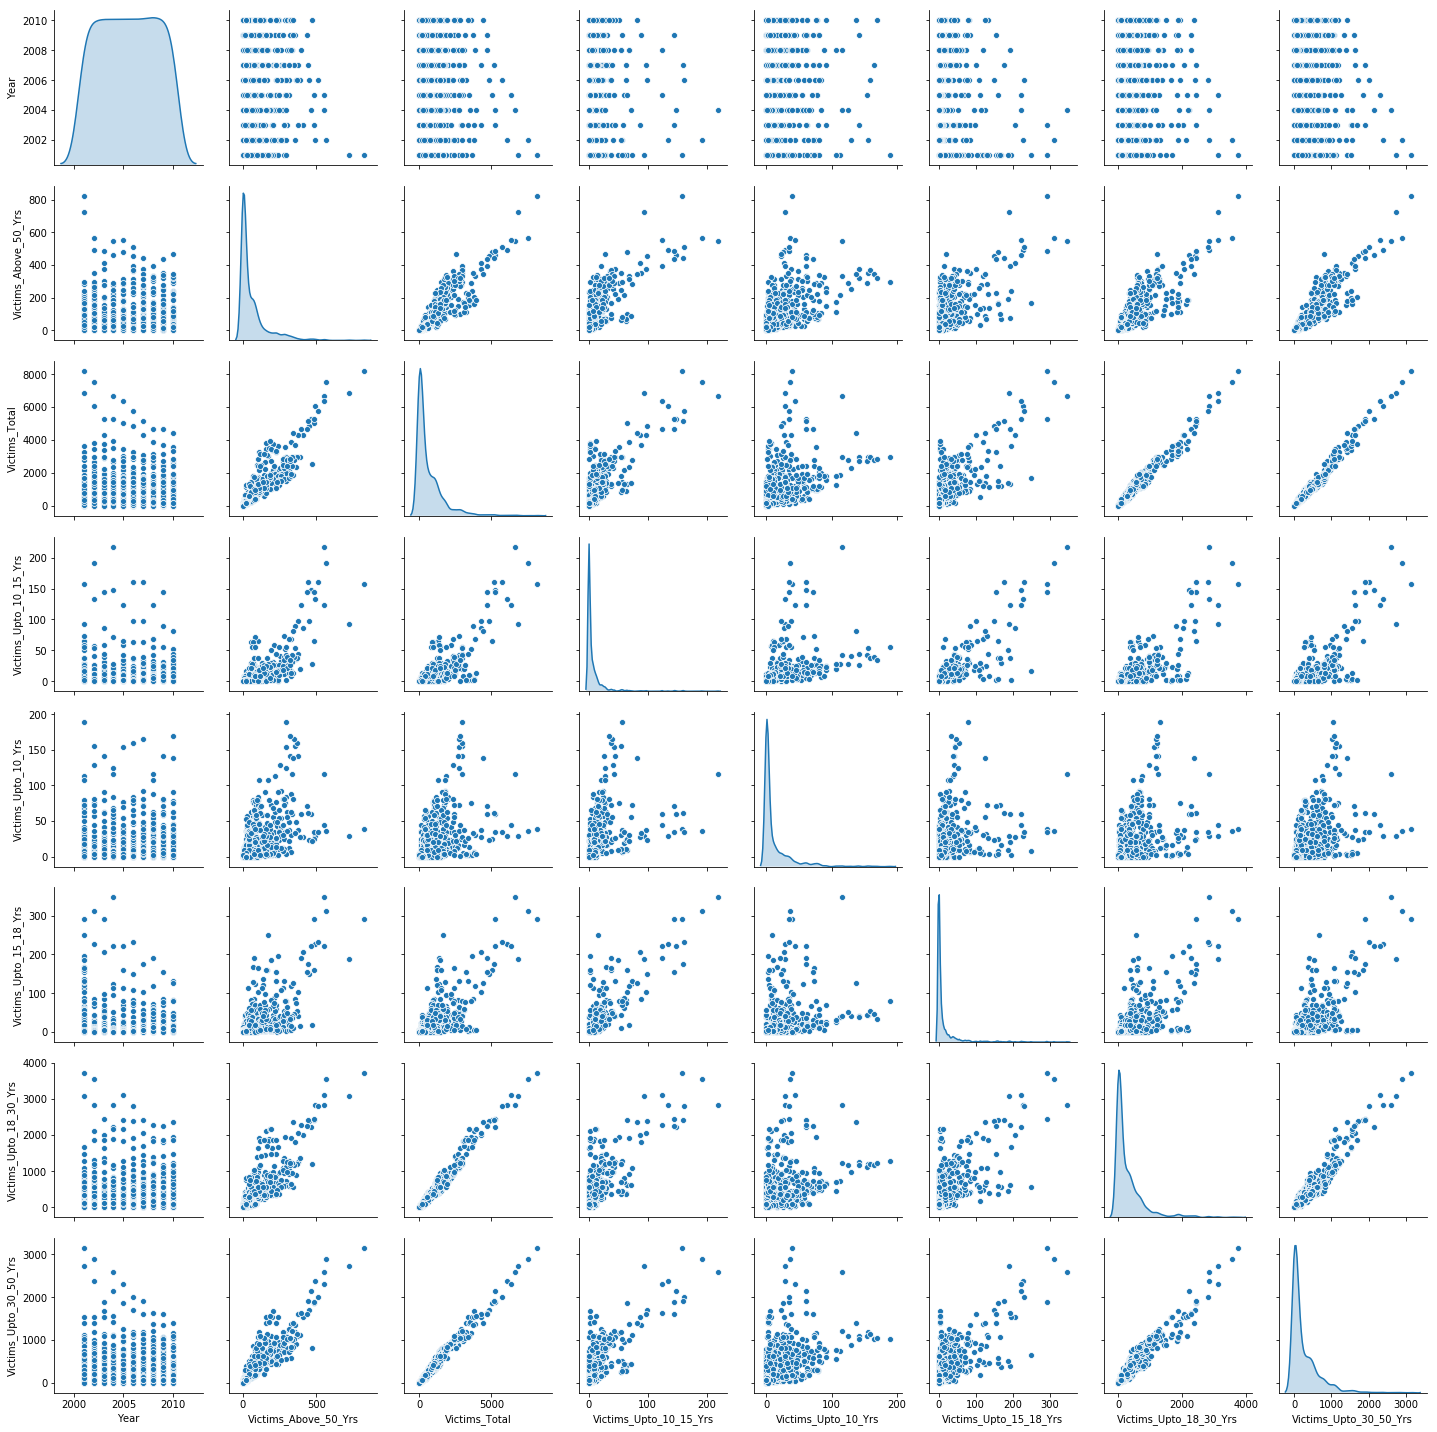

In [55]:
plt.figure(figsize=[13,13])
sns.pairplot(df,diag_kind='kde')

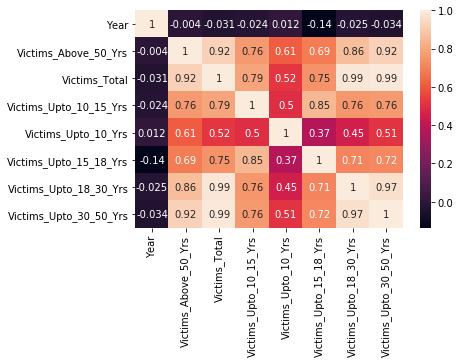

In [56]:

sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
df.Group_Name.value_counts()

Murder - Total Victims     342
Murder - Male Victims      339
Murder - Female Victims    337
Name: Group_Name, dtype: int64

In [59]:
df.Area_Name.value_counts()

Rajasthan                    30
Uttar Pradesh                30
Chandigarh                   30
Tripura                      30
Delhi                        30
Haryana                      30
Karnataka                    30
Arunachal Pradesh            30
Goa                          30
Manipur                      30
Bihar                        30
Meghalaya                    30
Tamil Nadu                   30
Andhra Pradesh               30
Chhattisgarh                 30
Puducherry                   30
Andaman & Nicobar Islands    30
Odisha                       30
Himachal Pradesh             30
West Bengal                  30
Assam                        30
Gujarat                      30
Mizoram                      30
Jharkhand                    30
Maharashtra                  30
Jammu & Kashmir              30
Punjab                       30
Kerala                       30
Nagaland                     30
Uttarakhand                  30
Madhya Pradesh               30
Sikkim  

In [60]:
df.Year.value_counts()

2008    104
2009    102
2007    102
2006    102
2005    102
2004    102
2003    102
2010    101
2002    101
2001    100
Name: Year, dtype: int64

In [61]:
df.Victims_Above_50_Yrs.value_counts()[0:5]

0.0     133
1.0      72
2.0      62
3.0      44
4.0      27
6.0      20
14.0     18
8.0      18
16.0     15
25.0     14
5.0      14
Name: Victims_Above_50_Yrs, dtype: int64

In [62]:
df.head()

,Area_Name,Year,Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,0.0,6,0.0,0.0,0.0,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [0]:
dummy=pd.get_dummies(df)

In [64]:
dummy.head()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,Area_Name_Arunachal Pradesh,Area_Name_Assam,Area_Name_Bihar,Area_Name_Chandigarh,Area_Name_Chhattisgarh,Area_Name_Dadra & Nagar Haveli,Area_Name_Daman & Diu,Area_Name_Delhi,Area_Name_Goa,Area_Name_Gujarat,Area_Name_Haryana,Area_Name_Himachal Pradesh,Area_Name_Jammu & Kashmir,Area_Name_Jharkhand,Area_Name_Karnataka,Area_Name_Kerala,Area_Name_Lakshadweep,Area_Name_Madhya Pradesh,Area_Name_Maharashtra,Area_Name_Manipur,Area_Name_Meghalaya,Area_Name_Mizoram,Area_Name_Nagaland,Area_Name_Odisha,Area_Name_Puducherry,Area_Name_Punjab,Area_Name_Rajasthan,Area_Name_Sikkim,Area_Name_Tamil Nadu,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims
0,2001,0.0,6,0.0,0.0,0.0,4.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2001,67.0,607,15.0,38.0,43.0,269.0,175.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2001,2.0,16,0.0,0.0,0.0,10.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2001,11.0,128,8.0,4.0,23.0,45.0,37.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2001,12.0,366,0.0,0.0,40.0,191.0,123.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:

x=dummy.drop('Victims_Upto_30_50_Yrs',axis=1)
y=dummy.Victims_Upto_30_50_Yrs

In [0]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
df_scaled=dummy.apply(zscore)

In [0]:
from sklearn.cluster import KMeans

In [178]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:  # to generate the clusters
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,47564.471513
1,2,43247.930870
2,3,41607.431739
3,4,40231.552073
4,5,38563.375139
5,6,37530.779926
6,7,36618.385047
7,8,35111.179040
8,9,34620.668833
9,10,33554.985467


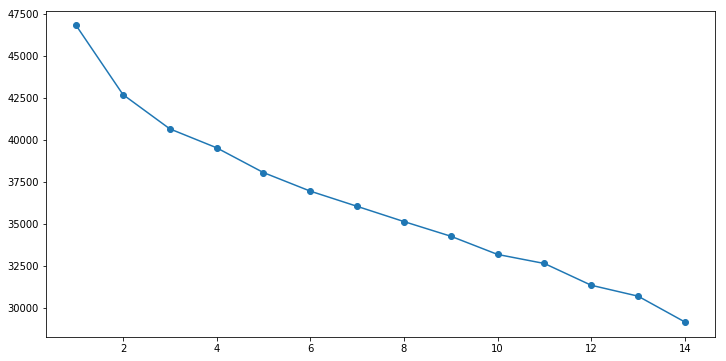

In [70]:
# Elbow Plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [71]:
d1=46828.000000-42707.339671
d1

4120.6603289999985

In [0]:
d2=42707.339671-40665.978085
d2

2041.361585999999

In [0]:
d3=40665.978085-39310.718838
d3

1355.2592470000018

In [0]:
d4=39310.718838-38065.415713
d4

1245.3031249999985

In [0]:
d5=38065.415713-37379.217257
d5

686.1984560000055

In [0]:
d6=37379.217257-36278.505612
d6

1100.7116449999958

# Observations 

The number of clusters generated are 5.

In [0]:
kmeans=KMeans(n_clusters=5,n_init=15,random_state=123)

In [0]:
preds=kmeans.fit_predict(df_scaled)

In [164]:
preds

array([0, 0, 0, ..., 2, 3, 3], dtype=int32)

In [0]:
centroids=kmeans.cluster_centers_

In [76]:
centroids

array([[ 2.02900825e-02, -2.17323084e-01, -1.80465819e-01,
        -2.05072995e-01, -1.96678391e-01, -1.79725984e-01,
        -1.70373998e-01, -1.61874892e-01,  4.63809756e-02,
        -1.74253759e-01,  4.63809756e-02,  4.63809756e-02,
        -1.74253759e-01,  4.63809756e-02,  2.43175022e-02,
         5.99728520e-02,  5.83053794e-02,  4.63809756e-02,
         4.63809756e-02,  2.25402872e-03,  4.63809756e-02,
         4.63809756e-02,  2.43175022e-02,  4.63809756e-02,
        -1.74253759e-01,  4.63809756e-02,  6.92416833e-02,
        -1.74253759e-01, -1.74253759e-01,  4.63809756e-02,
         4.63809756e-02,  4.63809756e-02,  4.63809756e-02,
         4.63809756e-02,  4.63809756e-02,  4.63809756e-02,
         4.63809756e-02,  5.30547832e-02, -1.74253759e-01,
         4.63809756e-02, -1.74253759e-01,  4.63809756e-02,
         4.63809756e-02, -7.03463218e-01, -7.06585892e-01,
         1.40591898e+00],
       [ 4.10851459e-03, -4.55168667e-01, -4.61531096e-01,
        -2.11404036e-01, -2.41

In [77]:
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))
centroid_df

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,Area_Name_Arunachal Pradesh,Area_Name_Assam,Area_Name_Bihar,Area_Name_Chandigarh,Area_Name_Chhattisgarh,Area_Name_Dadra & Nagar Haveli,Area_Name_Daman & Diu,Area_Name_Delhi,Area_Name_Goa,Area_Name_Gujarat,Area_Name_Haryana,Area_Name_Himachal Pradesh,Area_Name_Jammu & Kashmir,Area_Name_Jharkhand,Area_Name_Karnataka,Area_Name_Kerala,Area_Name_Lakshadweep,Area_Name_Madhya Pradesh,Area_Name_Maharashtra,Area_Name_Manipur,Area_Name_Meghalaya,Area_Name_Mizoram,Area_Name_Nagaland,Area_Name_Odisha,Area_Name_Puducherry,Area_Name_Punjab,Area_Name_Rajasthan,Area_Name_Sikkim,Area_Name_Tamil Nadu,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims
0,0.020290,-0.217323,-0.180466,-0.205073,-0.196678,-0.179726,-0.170374,-0.161875,0.046381,-0.174254,0.046381,0.046381,-0.174254,0.046381,0.024318,0.059973,0.058305,0.046381,0.046381,0.002254,0.046381,0.046381,0.024318,0.046381,-0.174254,0.046381,0.069242,-0.174254,-0.174254,0.046381,0.046381,0.046381,0.046381,0.046381,0.046381,0.046381,0.046381,0.053055,-0.174254,0.046381,-0.174254,0.046381,0.046381,-0.703463,-0.706586,1.405919
1,0.004109,-0.455169,-0.461531,-0.211404,-0.241268,-0.232873,-0.431604,-0.497479,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,-0.018129,-0.019936,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.043223,0.007127,-0.174254,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,0.007127,-0.005289,0.007127,0.007127,-0.011011,0.007127,0.007127,1.421538,-0.706586,-0.711279
2,0.005239,-0.207768,-0.229357,-0.247088,-0.283431,-0.204860,-0.242018,-0.192611,0.031059,-0.174254,0.031059,0.031059,-0.174254,0.031059,0.031059,0.044129,0.043238,0.031059,0.031059,0.010528,0.031059,0.031059,0.031059,0.031059,0.031059,0.031059,-0.076999,-0.174254,-0.174254,0.031059,0.031059,0.031059,0.031059,0.031059,0.031059,0.031059,0.031059,0.037479,0.031059,0.031059,-0.174254,0.031059,0.031059,-0.703463,1.415256,-0.711279
3,-0.004458,4.148151,4.577981,5.650719,1.528694,4.797423,4.592388,4.284486,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.168175,-0.158670,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.076999,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.171238,-0.174254,-0.174254,5.738757,-0.174254,-0.174254,-0.703463,0.354335,0.347320
4,-0.070661,1.581911,1.494132,0.707105,1.572562,0.751157,1.415659,1.511577,-0.174254,0.845231,-0.174254,-0.174254,0.845231,-0.174254,-0.123280,-0.168175,-0.158670,-0.174254,-0.174254,-0.021331,-0.174254,-0.174254,-0.123280,-0.174254,0.335489,-0.174254,-0.076999,0.845231,1.354973,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.174254,-0.171238,0.335489,-0.174254,-0.123280,-0.174254,-0.174254,-0.501954,0.043376,0.456830


In [0]:
from mpl_toolkits.mplot3d import Axes3D

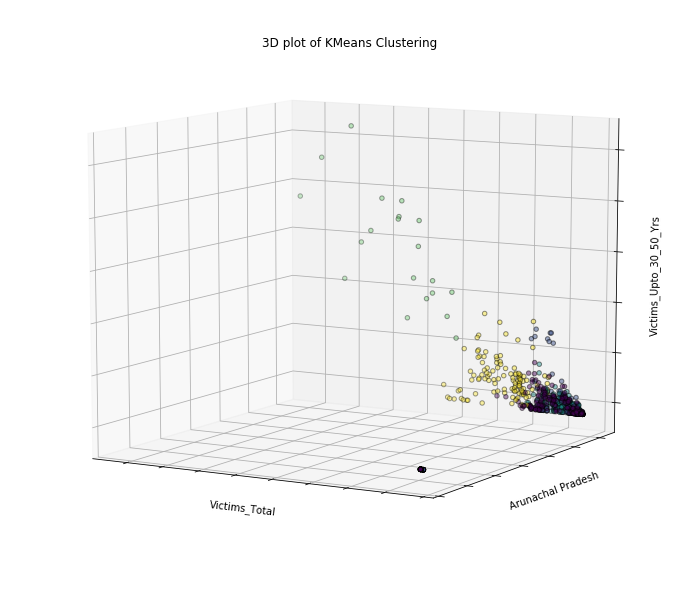

In [97]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=120)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 2], df_scaled.iloc[:, 10], df_scaled.iloc[:,3],
           c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Victims_Total")
ax.set_ylabel("Arunachal Pradesh")
ax.set_zlabel("Victims_Upto_30_50_Yrs")
ax.set_title('3D plot of KMeans Clustering')
plt.show()

In [80]:
# to generate the labels
kmeans.labels_

array([1, 1, 1, ..., 3, 0, 0], dtype=int32)

In [0]:
# create a new dataframe only for labels and converting it into categorical variable
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [0]:
df_labels['labels'].value_counts()

2    326
0    243
5    225
1    174
3     30
4     20
Name: labels, dtype: int64

In [0]:
murder_df_labeled=df.join(df_labels)

In [0]:
df_scaled['labels']=df_labels
murder_clusters=df_scaled.groupby(['labels'])
df0=murder_clusters.get_group(0)
df1=murder_clusters.get_group(1)
df2=murder_clusters.get_group(2)
df3=murder_clusters.get_group(3)
df4=murder_clusters.get_group(4)
df5=murder_clusters.get_group(5)



In [0]:
c0=kmeans.cluster_centers_[0,:] # Centroid for class 0
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]
c3=kmeans.cluster_centers_[3,:]
c4=kmeans.cluster_centers_[4,:]
c5=kmeans.cluster_centers_[5,:]
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)

[ 0.00487965 -0.37793677 -0.36026822 -0.29564917 -0.34983057 -0.29438929
 -0.34533056 -0.34527435  0.06908002 -0.17425376  0.06908002  0.04474664
 -0.17425376  0.06908002  0.06908002  0.08344485  0.08062797  0.06908002
  0.06908002  0.04474664  0.06908002  0.06908002  0.04474664 -0.17425376
 -0.17425376  0.06908002 -0.07699905 -0.17425376 -0.17425376  0.06908002
  0.06908002  0.06908002  0.06908002  0.06908002  0.06908002  0.06908002
 -0.17425376  0.0761302  -0.17425376  0.06908002 -0.17425376  0.06908002
 -0.00392011 -0.70346322  1.41525611 -0.71127854]
[-0.0144886   1.11806619  1.08826749  0.34778605  0.53110162  0.57752335
  1.01392988  1.17391938 -0.17425376  0.50540266 -0.17425376 -0.10628812
  0.50540266 -0.17425376 -0.00433965 -0.16817499 -0.1586702  -0.17425376
 -0.17425376  0.19955727 -0.17425376 -0.17425376 -0.10628812  0.50540266
  0.50540266 -0.17425376 -0.07699905  0.50540266 -0.17425376 -0.17425376
 -0.17425376 -0.17425376 -0.17425376 -0.17425376 -0.17425376 -0.17425376
 

In [0]:
# Inertia

I0=0
I1=0
I2=0
I3=0
I4=0
I5=0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)# The inertia is calculate for all the records of class 0
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):    
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
for i in np.arange(df3.shape[0]):    
    I3=I3+np.sum((df3.iloc[i,:-1]-c3)**2)
for i in np.arange(df4.shape[0]):    
    I4=I4+np.sum((df4.iloc[i,:-1]-c4)**2)
for i in np.arange(df5.shape[0]):    
    I5=I5+np.sum((df5.iloc[i,:-1]-c5)**2)
    print(I0)
    print(I1)
    print(I2)
    print(I3)
    print(I4)
    print(I5)
    

8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
36.32868413611091
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
72.51939150375577
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
108.83885097819224
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
147.40404063793267
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
184.51486524258448
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
220.77779784666814
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
261.42392641736353
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
297.4726958057587
8663.80156113747
6983.440191707646
12160.170566418868
297.718423251749
388.0479377464414
339.64180147543846
8663.80156113747
6983.440191707

In [0]:
#Calculation Of Total Inertia

total_inertia=I0+I1+I2+I3+I4+I5
total_inertia

36953.8698234038

# Agglomerative Clustering

In [0]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [103]:
z=linkage(df_scaled,'ward')
c,coph_dists=cophenet(z,pdist(df_scaled))  
c

0.5244048035844115

In [119]:
z=linkage(df_scaled,'average')
c,coph_dists=cophenet(z,pdist(df_scaled))  
c

0.9113424028255156

In [105]:
z=linkage(df_scaled,'complete')
c,coph_dists=cophenet(z,pdist(df_scaled))  
c

0.8537921603738956

In [106]:
z=linkage(df_scaled,'weighted')
c,coph_dists=cophenet(z,pdist(df_scaled))  
c

0.8781260099868344

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average') # if we do not specify euclidean then it goes ward

In [109]:
model.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [0]:
m=pd.DataFrame(model.labels_)

In [111]:
m[0].value_counts()

0    932
4     30
3     30
1     20
2      6
Name: 0, dtype: int64

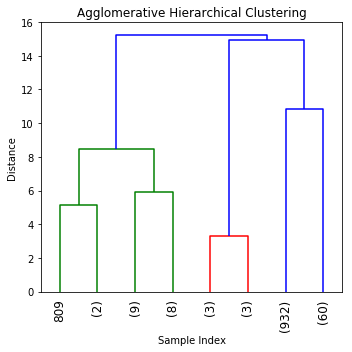

In [120]:
plt.figure(figsize=(5,5))
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90,p=2,truncate_mode='level') # p and truncate_mode are the two most important arguments.
plt.tight_layout()

In [0]:
df_scaled['labels']=model.labels_
m_clusters=df_scaled.groupby(['labels'])
df10=m_clusters.get_group(0)
df11=m_clusters.get_group(1)
df12=m_clusters.get_group(2)
df13=m_clusters.get_group(3)
df14=m_clusters.get_group(4)

In [116]:
I6=0
I7=0
I8=0
I9=0
I10=0
for i in np.arange(df10.shape[0]):
    I6=I6+np.sum((df10.iloc[i,:-1]-df10)**2)# The inertia is calculate for all the records of class 0
for i in np.arange(df11.shape[0]):
    I7=I7+np.sum((df11.iloc[i,:-1]-df11)**2)
for i in np.arange(df12.shape[0]):    
    I8=I8+np.sum((df12.iloc[i,:-1]-df12)**2)
for i in np.arange(df13.shape[0]):    
    I9=I9+np.sum((df13.iloc[i,:-1]-df13)**2)
for i in np.arange(df14.shape[0]):    
    I10=I10+np.sum((df14.iloc[i,:-1]-df14)**2)
    print(I6)
    print(I7)
    print(I8)
    print(I9)
    print(I10)

Area_Name_Andaman & Nicobar Islands    1.892235e+06
Area_Name_Andhra Pradesh               1.892235e+06
Area_Name_Arunachal Pradesh            1.892235e+06
Area_Name_Assam                        1.892235e+06
Area_Name_Bihar                        0.000000e+00
Area_Name_Chandigarh                   1.892235e+06
Area_Name_Chhattisgarh                 1.892235e+06
Area_Name_Dadra & Nagar Haveli         1.892600e+06
Area_Name_Daman & Diu                  1.893144e+06
Area_Name_Delhi                        1.892235e+06
Area_Name_Goa                          1.892235e+06
Area_Name_Gujarat                      1.892235e+06
Area_Name_Haryana                      1.892235e+06
Area_Name_Himachal Pradesh             1.892235e+06
Area_Name_Jammu & Kashmir              1.892235e+06
Area_Name_Jharkhand                    1.892235e+06
Area_Name_Karnataka                    1.892235e+06
Area_Name_Kerala                       1.892235e+06
Area_Name_Lakshadweep                  0.000000e+00
Area_Name_Ma

In [117]:
total_inertia1=I6+I7+I8+I9+I10
total_inertia1

Area_Name_Andaman & Nicobar Islands    1.892235e+06
Area_Name_Andhra Pradesh               1.892235e+06
Area_Name_Arunachal Pradesh            1.892235e+06
Area_Name_Assam                        1.892235e+06
Area_Name_Bihar                        0.000000e+00
Area_Name_Chandigarh                   1.892235e+06
Area_Name_Chhattisgarh                 1.892235e+06
Area_Name_Dadra & Nagar Haveli         1.892600e+06
Area_Name_Daman & Diu                  1.893144e+06
Area_Name_Delhi                        1.892235e+06
Area_Name_Goa                          1.892235e+06
Area_Name_Gujarat                      1.892235e+06
Area_Name_Haryana                      1.892235e+06
Area_Name_Himachal Pradesh             1.892235e+06
Area_Name_Jammu & Kashmir              1.892235e+06
Area_Name_Jharkhand                    1.892235e+06
Area_Name_Karnataka                    1.892235e+06
Area_Name_Kerala                       1.892235e+06
Area_Name_Lakshadweep                  0.000000e+00
Area_Name_Ma

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_std=StandardScaler().fit_transform(x)

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X_std,y,test_size=0.30,random_state=123)

In [0]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression,PLSSVD
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [126]:
dt_model = DecisionTreeRegressor(criterion = 'mse' )
dt_model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
y_predict=dt_model.predict(xtest)

In [128]:
r2=metrics.r2_score(ytest,y_predict)
r2

0.974443374901874

In [129]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00098328e+00 -3.96626589e-03 -3.08028051e-02 ...  1.60206566e-03
   1.24483426e-04 -1.72039298e-03]
 [-3.96626589e-03  1.00098328e+00  9.23192249e-01 ... -3.06043043e-01
   8.08917142e-02  2.24204440e-01]
 [-3.08028051e-02  9.23192249e-01  1.00098328e+00 ... -3.06142609e-01
   7.11131490e-02  2.34060802e-01]
 ...
 [ 1.60206566e-03 -3.06043043e-01 -3.06142609e-01 ...  1.00098328e+00
  -4.97545934e-01 -5.00850284e-01]
 [ 1.24483426e-04  8.08917142e-02  7.11131490e-02 ... -4.97545934e-01
   1.00098328e+00 -5.03073559e-01]
 [-1.72039298e-03  2.24204440e-01  2.34060802e-01 ... -5.00850284e-01
  -5.03073559e-01  1.00098328e+00]]


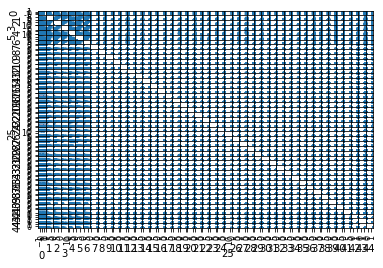

In [130]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [132]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.78486527e-02 -5.19326847e-02  1.35800855e-01 ...  8.01842803e-16
  -4.42140896e-15  4.67720032e-15]
 [ 3.98416720e-01 -4.29980703e-02 -1.41126415e-01 ... -5.56068250e-16
   1.10778620e-15  2.75468707e-16]
 [ 4.11370965e-01  7.40426426e-02 -1.25254024e-01 ...  3.35582621e-15
  -5.64941632e-15 -8.44335771e-17]
 ...
 [-1.23141086e-01 -1.64987439e-01 -3.67209662e-03 ... -1.26702604e-16
  -2.08694613e-16  2.28185763e-17]
 [ 1.51240210e-02  4.01036283e-01  2.30029099e-02 ...  9.77763812e-17
   6.02021183e-16 -2.62104822e-16]
 [ 1.07597930e-01 -2.35776941e-01 -1.92939484e-02 ...  2.88290258e-16
  -2.49699520e-16  2.49287825e-16]]

 Eigen Values 
%s [ 5.47875387e+00  1.63196086e+00  2.50619703e-01  1.90554709e-01
  1.30257671e-01  7.17494430e-02  5.53170923e-02  2.68528217e-03
  1.52289905e+00  1.47538230e+00  1.23229651e+00  9.75847130e-01
  1.08152097e+00  1.05048998e+00  1.01286805e+00  1.03760573e+00
  1.02852228e+00  1.03011956e+00  1.03173728e+00 -2.20013949e-15
  

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [134]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 12.16304887  15.7860661   19.16696182  22.4423685   25.17811516
  27.57913422  29.91126326  32.21478876  34.50528605  36.79498466
  39.08468327  41.37438187  43.66408048  45.95377908  48.24347769
  50.53317629  52.8228749   55.1125735   57.40227211  59.69197071
  61.98166932  64.27136793  66.56106653  68.85076514  71.14046374
  73.43016235  75.71986095  78.00955956  80.29925816  82.58895677
  84.87865538  87.16835398  89.45805259  91.74495849  94.02831835
  96.27692522  98.44334419  98.99972978  99.42276872  99.71194587
  99.87123245  99.99403857 100.         100.         100.        ]


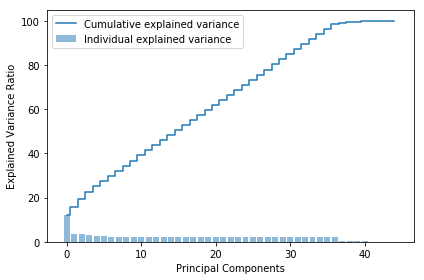

In [135]:
plt.figure(figsize=(6 , 4))
plt.bar(range(45), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(45), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [0]:

pca=PCA(0.95)

In [137]:

pca.fit(xtrain)
x_train=pca.transform(xtrain)
x_test=pca.transform(xtest)
pca.n_components_

35

In [140]:
pca.n_features_

45

In [0]:
pca=PCA(0.90)

In [142]:
pca.fit(xtrain)
x_train=pca.transform(xtrain)
x_test=pca.transform(xtest)
pca.n_components_

33

In [143]:
pca.n_features_

45

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf=RandomForestRegressor()

In [0]:
model1=rf.fit(xtrain,ytrain)
pred=model1.predict(xtest)

In [149]:
r2=metrics.r2_score(ytest,pred)
r2

0.9791211458984196

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score


Number Of Clusters:
2
Silhouette score value
0.8369086766559627
Number Of Clusters:
3
Silhouette score value
0.9266147894025502
Number Of Clusters:
4
Silhouette score value
0.62526696146376
Number Of Clusters:
5
Silhouette score value
0.6250815104857217
Number Of Clusters:
6
Silhouette score value
0.4244842544182705
Number Of Clusters:
7
Silhouette score value
0.4281187695479603
Number Of Clusters:
8
Silhouette score value
0.4331344404800965
Number Of Clusters:
9
Silhouette score value
0.33939173658763766
Number Of Clusters:
10
Silhouette score value
0.33780676832017953
Number Of Clusters:
11
Silhouette score value
0.33919172823423754
Number Of Clusters:
12
Silhouette score value
0.334466413832412
Number Of Clusters:
13
Silhouette score value
0.3354647105499684
Number Of Clusters:
14
Silhouette score value
0.3331921215634294


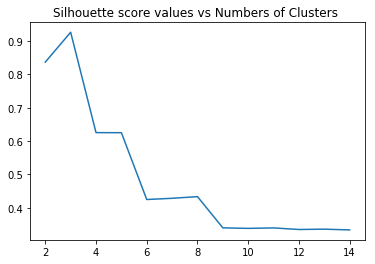

Optimal number of components is:
3


In [190]:
 
obs = np.concatenate( (np.random.randn(100, 2) , 20 + np.random.randn(300, 2) , -15+np.random.randn(200, 2)))
silhouette_score_values=list()
 
NumberOfClusters=range(2,15)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print ("Number Of Clusters:")
    print (i)
    print ("Silhouette score value")
    print (silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)